In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Titanic

I know what you're thinking - this dataset and problem has been beaten to death over the years. However, I think that makes it a great candidate for learning. I propose to attack this prediction problem with a number of different statistical approaches as a means of learning on a dataset/problem that has numerous opportunities for evaluation and comparison.

In this code workbook I will walk through some very basic cleaning steps and exploratory data analysis. In future project installments, I will adjust my approach based on peer feedback, develop a plan for modeling, and evaluate a series of models from a statistical perspective. It's quite easy these days to dump features into an algorithm until a sufficient fit is achieved. I am proposing a statistics-driven rather than brute-force approach to foster learning as opposed to a strict focus on model performance.

## Data Loading and Cleaning

I will start with loading the training dataset that I retrieved from (Kaggle's iconic Titanic data science competition)[https://www.kaggle.com/competitions/titanic/data?select=train.csv].

In later installments, I'll use the accompanying testing dataset to evaluate the models that I build, but for Part 1 I will focus on getting the training set into suitable shape for this project.

### Loading the Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


An initial glance at the data shows information about passengers including names, sex, age, and other demographic data. In addition, each row appears to contain information about tickets, fares, cabin assignment, port of departure, and survival status. It's also clear that there are some nulls or NaNs even in the first few rows.

Next, I'll take a few different approaches to handling the missing data including imputing values in some cases (e.g. age) or dropping rows will nulls altogether (e.g. cabin assignment). Let's start with a basic row count.

In [3]:
# row count
df.shape[0]

891

There are a total of 891 rows in the data. Let's look at how many nulls there are by field.

In [4]:
# count nulls
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It looks like both Age and Cabin have a signficant number of nulls. Given the percentage of total rows that are null in each, we'll handle them differently.

In [5]:
# impute median age for missing Age values
df['Age'].fillna(df['Age'].median(), inplace=True)

In the code block above, we have imputed the missing Age values with the median value of the non-null values. Perhaps not a perfect replacement, but also probably reasonably representative.

In [6]:
# mean and median age values
print(f"The mean age is {df['Age'].mean()} and the median age is {df['Age'].median()} for the inputed data.")

The mean age is 29.36158249158249 and the median age is 28.0 for the inputed data.


Those aggregate ages seem reasonable and there isn't a huge spread between mean and median.

The vast majority of Cabin values are missing. Short of tracking down a supplemental dataset, I don't see a reasonable way of imputing these values. As such, I am going to drop this column. 

In [7]:
# drop cabin column
df.drop('Cabin', axis=1, inplace=True)

The 'Embarked' column had a couple missing values, so I'll also drop any remaining rows with missing values in any field.

In [8]:
df.dropna(inplace=True)

Now, I'll consider the data clean enough to get started with exploratory data analysis.

### Exploratory Data Analysis

A basic description:

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above, I can see that all the remaining rows have values in all fields. Some of these data, such as PassengerId don't really make sense in terms of mean, std, min, and max, but most do. We can see that roughly 38% of passengers survived. The average passenger was around 29 years old.

The columns described above are just those that are numerical. There are many others such as sex, passenger class, etc that are categorical. We can look at these in a correlation matrix to get a sense of there relative proportion and survival rate.

I'll use the seaborne plotting library (a wrapper for matplotlib) to look at this.

/tmp/ipykernel_242/339871847.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


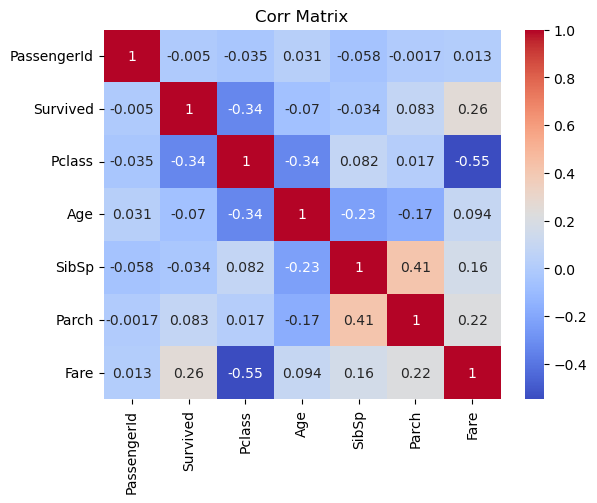

In [10]:
# create a correlation matrix
corr_matrix = df.corr()

# create a plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corr Matrix')
plt.show()

From this plot, I can immediately make a few intial observations:

- Passenger class and fare are (as expected) strongly correlated
- Passenger class and survial rate are somewhat correlated (-0.34)
- Passenger class and age are somewhat correlated (-0.34)
- SibSp (siblings/spouses) and Parch (parents/children) are correlated (0.41)
- Fare and survival are correlated

It seems like that a sufficient number of these features are correleted to the extent that it may be possible/advised to distill them with something like PCA (principal component analysis).

We can also build histograms to get a sense of the distribution types of the various fields.

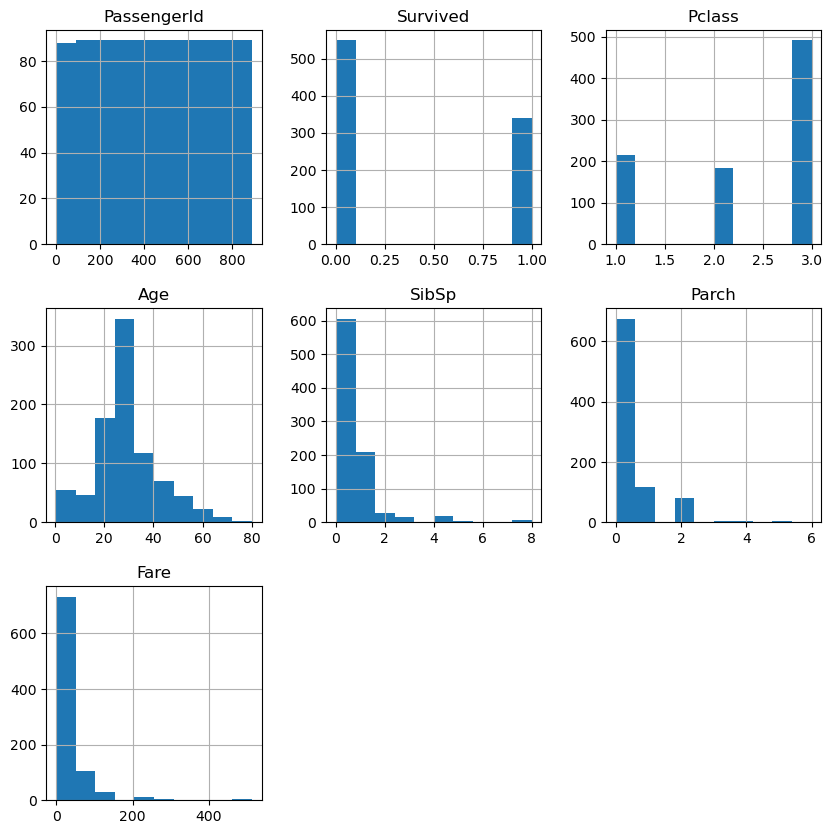

In [11]:
# create histograms
df.hist(figsize=(10,10), bins=10)
plt.show()

A few observations can be made about the distributions:

- as expected, survial is binomial (either survived or didn't)
- age appears to be roughly normally distributed with a right skew
- SibSp, Parch, and Fare all seem to have a distinct right skew

Boxplots might also be useful in getting a sense of the means, medians, and ranges of the various fields in the dataset:

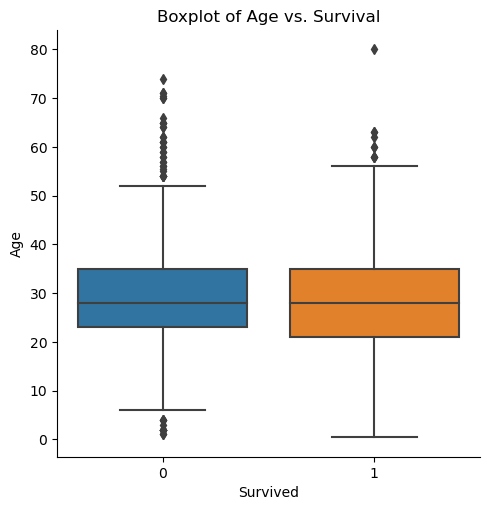

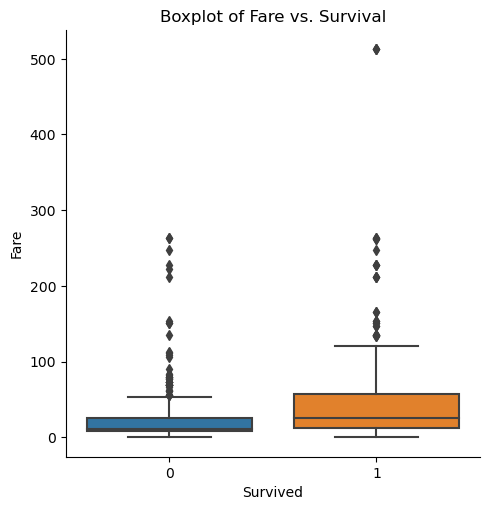

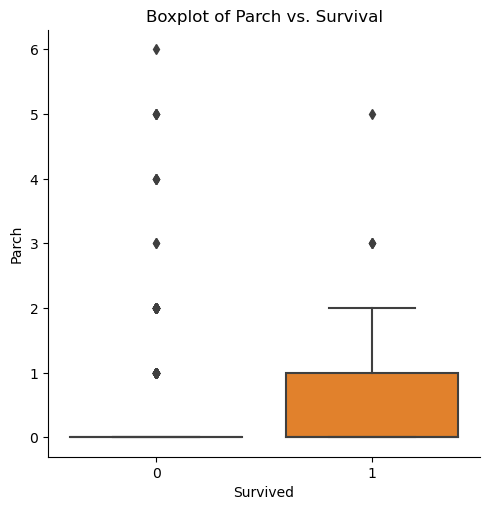

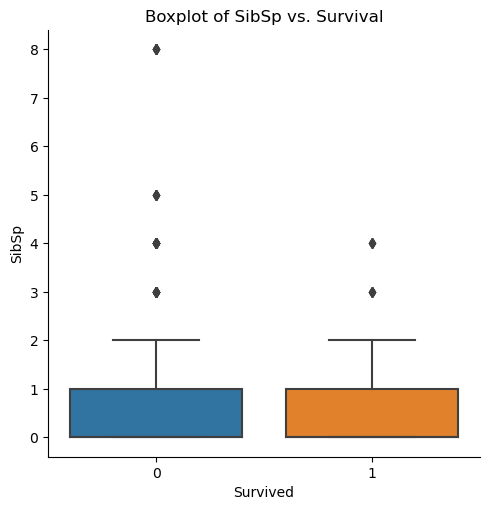

In [12]:
# generate boxplots for numerical features
num_features = ['Age', 'Fare', 'Parch', 'SibSp']

# create faceted plot for each feature vs survival
for feature in num_features:
    sns.catplot(x='Survived', y=feature, kind='box', data=df)
    plt.title(f'Boxplot of {feature} vs. Survival')
    plt.show()

It could also be interesting to look at the pairwise relatinships between features:

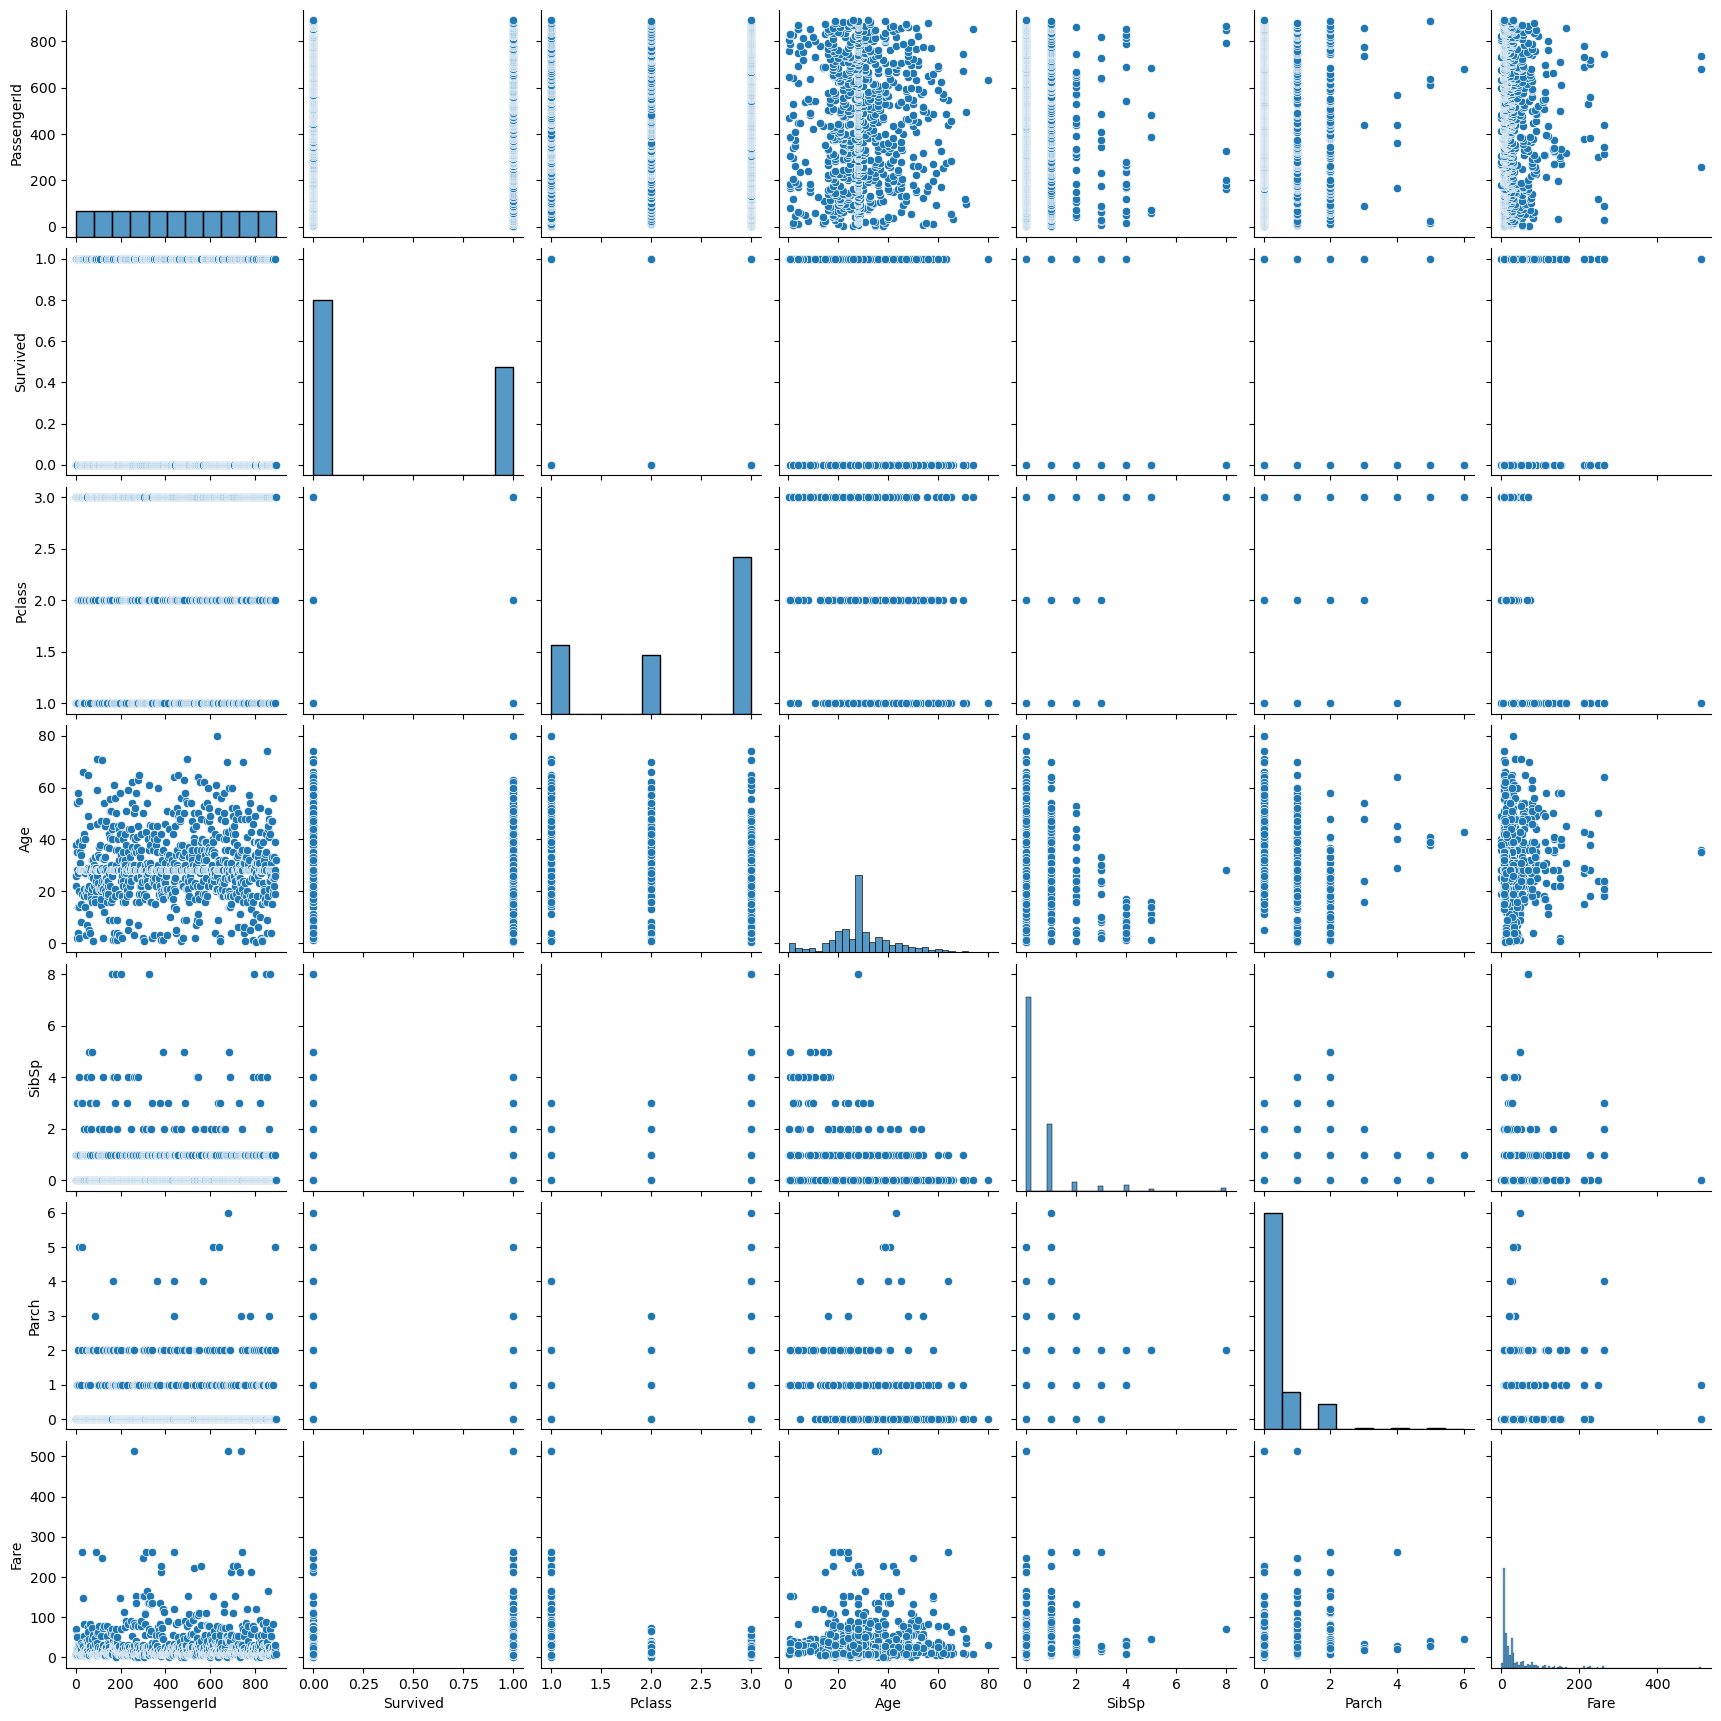

In [13]:
sns.pairplot(df)
plt.show()

The pairplot is difficult to draw many immediate conclusions from, but I will explore each feature in greater depth in future project installments.

### Summary

I am going to focus on a well-beaten path for this project. What is lacks in novelty will ideally be offset by the opportunity to focus on an intuitive dataset with numerous benchmarks and evaluation opportunities.